# TiberCAD: Rampa T

### Importazioni

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os

In [55]:
arr_temperatura = [15, 30, 45, 70, 100, 150] 

### Varshni

In [56]:
# legge varshni
def varshni (T, E_0, alpha, beta):
    T = np.asarray(T)  
    return E_0 - (alpha * T*T) / (beta + T)

In [57]:
# Funzione per il calcolo del chi2 ridotto per fit varshni  
def chi2_varshni (x_fit, y_fit, err_y, popt):
   
    y_fit_values = varshni(x_fit, *popt)
    
    # calcolo residui
    residuals = y_fit - y_fit_values
        
    chi2 = np.sum((residuals / err_y) ** 2)
    dof = len(y_fit) - len(popt)
    
    return chi2, dof

### File

In [58]:
# Instanziazione
file1 = "data/RAMPA_T/exp_params.txt"
file2 = "data/RAMPA_T/opt_params.txt"

# Lettura #
# in ascissa va la temperatura
y1 = np.loadtxt(file1)
y2 = np.loadtxt(file2)

---

## Parametri sperimentali: h2e23 - ar0e029 - 12pc

• Varshni 1
 - $E_0$ = 1.6627955185163112
 - $\alpha$ = 0.0005190153834839414
 - $\beta$ = 194.09991801465685
 - chi2rid = 250.77274462403633


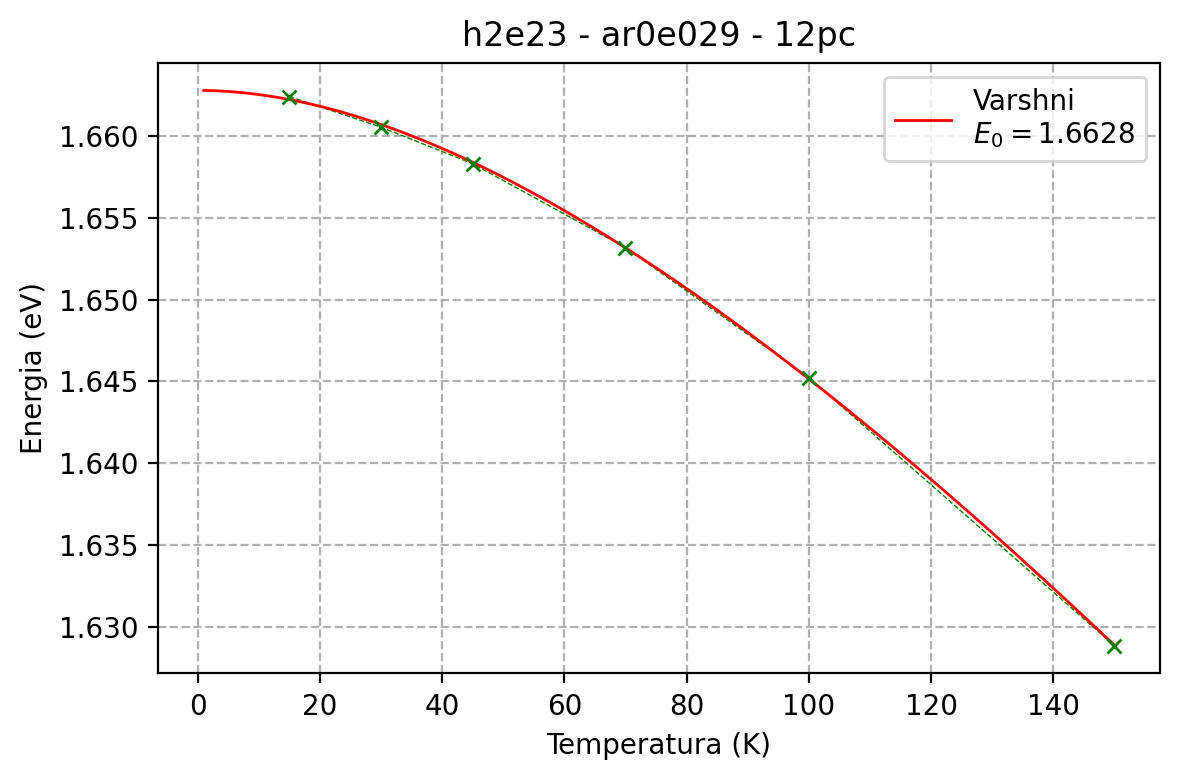

In [59]:
plt.figure(figsize=(6, 4), dpi=200)

# Plot del primo picco (no fit)
plt.errorbar(arr_temperatura, y1, yerr=0, fmt='gx', markersize=5, elinewidth=0, capsize=0)
plt.plot(arr_temperatura, y1, linestyle='--', color='g', linewidth=0.5) # unisce i punti

## FIT VARSHNI ##

# Intervallo continuo per il grafico
x_fit = np.linspace(1, 150, 500)  

# Fit 
popt1, pcov1 = curve_fit(varshni, arr_temperatura, y1, sigma=0.001, absolute_sigma=True, p0=[arr_temperatura[0], 3, 1], 
                bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))

# plot fit
plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label=f'Varshni\n$E_0={popt1[0]:.4f}$')

## CHI2 ## - ma senza errore non ha tanto senso
chi2_1, dof_1 = chi2_varshni (arr_temperatura, y1, err_y=0.00001, popt=popt1)

## PRINT RISULTATI FIT ##
print('• Varshni 1')
print(r' - $E_0$ =', popt1[0])
print(r' - $\alpha$ =', popt1[1])
print(r' - $\beta$ =', popt1[2])
print(' - chi2rid =', chi2_1/dof_1)


# Aggiungere etichette e legenda
plt.title("h2e23 - ar0e029 - 12pc")
plt.xlabel('Temperatura (K)')
plt.ylabel('Energia (eV)')
plt.grid(linestyle='--')
plt.legend()

# Mostrare il grafico
plt.tight_layout()
plt.show()



---

## Parametri ottimali: h2e23 - ar0e0186 - 12pc

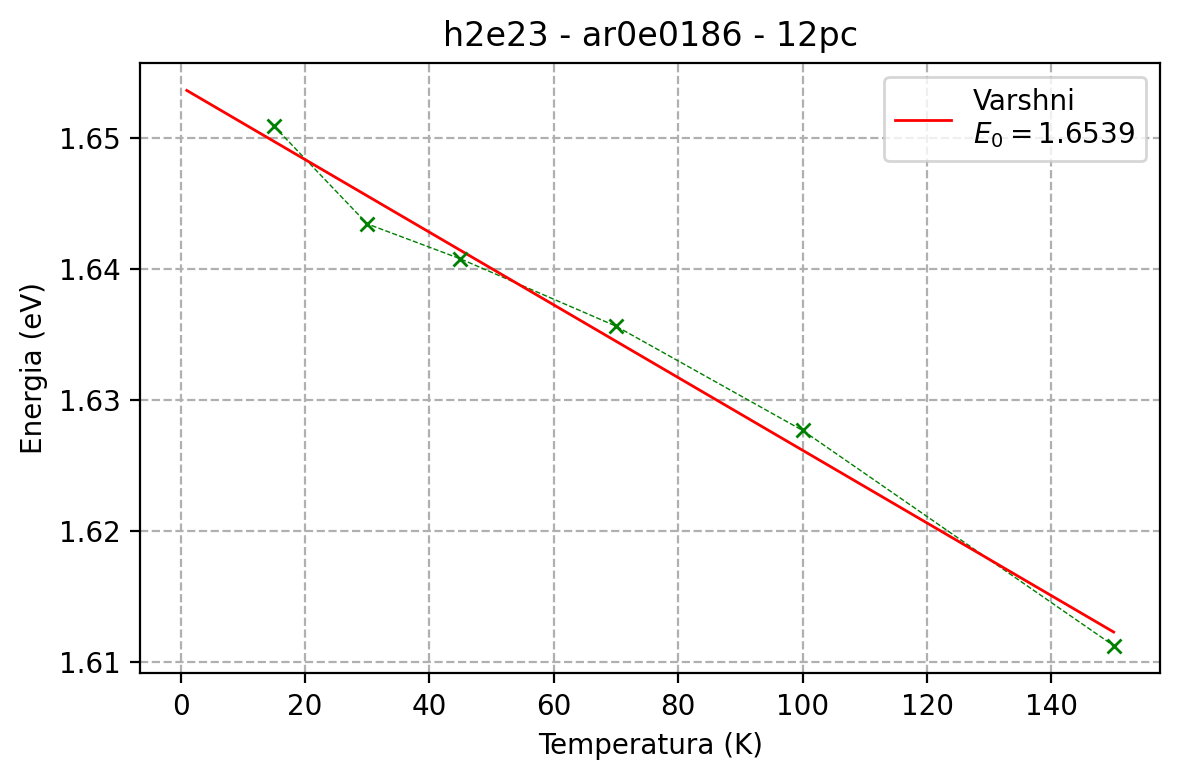

• Varshni 2
 - $E_0$ = 1.6538685300929423
 - $\alpha$ = 0.0002771254159116769
 - $\beta$ = 0.0025371151388759177
 - chi2rid = 36794.46363959206


In [61]:
plt.figure(figsize=(6, 4), dpi=200)

# Plot del primo picco (no fit)
plt.errorbar(arr_temperatura, y2, yerr=0, fmt='gx', markersize=5, elinewidth=0, capsize=0)
plt.plot(arr_temperatura, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti

## FIT VARSHNI ##

# Fit 
popt2, pcov2 = curve_fit(varshni, arr_temperatura, y2, sigma=0.001, absolute_sigma=True, p0=[arr_temperatura[0], 3, 1], 
                bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
# plot fit
plt.plot(x_fit, varshni(x_fit, *popt2), 'r-', linewidth=1, label=f'Varshni\n$E_0={popt2[0]:.4f}$')

# Aggiungere etichette e legenda
plt.title("h2e23 - ar0e0186 - 12pc")
plt.xlabel('Temperatura (K)')
plt.ylabel('Energia (eV)')
plt.grid(linestyle='--')
plt.legend()

# Mostrare il grafico
plt.tight_layout()
plt.show()

## CHI2 ## - ma senza errore non ha tanto senso
chi2_2, dof_2 = chi2_varshni (arr_temperatura, y2, err_y=0.00001, popt=popt2)

## PRINT RISULTATI FIT ##
print('• Varshni 2')
print(r' - $E_0$ =', popt2[0])
print(r' - $\alpha$ =', popt2[1])
print(r' - $\beta$ =', popt2[2])
print(' - chi2rid =', chi2_2/dof_2)


---